#Import libs

In [1]:
#========================================================
import numpy as np
import matplotlib.pyplot as plt
import re
#========================================================
import tensorflow as tf
import tensorflow_datasets as tfds
#========================================================
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Bidirectional
#========================================================

#Downloading Yelp dataset

In [2]:
# Downloading Yelp dataset
dtst_data = tfds.load("yelp_polarity_reviews")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/560000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0.incomplete7EFI2P/yelp_polarity_reviews-train.t…

Generating test examples...:   0%|          | 0/38000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0.incomplete7EFI2P/yelp_polarity_reviews-test.tf…

Dataset yelp_polarity_reviews downloaded and prepared to /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0. Subsequent calls will reuse this data.


#Preparing train and test datasets

In [3]:
# Splitting dataset into train and test sets
train_text_set, test_text_set = dtst_data['train'], dtst_data['test']

# Train set processing
x_train, y_train = [], []
for review in train_text_set:
    # Text decoding
    x_train.append(review["text"].numpy().decode("utf-8"))
    # Label to int
    y_train.append(int(review["label"].numpy()))

# Test set processing
x_test, y_test = [], []
for review in test_text_set:
    # Text decoding
    x_test.append(review["text"].numpy().decode("utf-8"))
    # Label to int
    y_test.append(int(review["label"].numpy()))

In [15]:
# Function for review examples viewing
def view_reviews(dtst_x, dtst_y, dtst_type):
    if dtst_type == 1:
        print("\nTrain reviews examples:")
    if dtst_type == 2:
        print("\nTest reviews examples:")
    if dtst_type != 1 and dtst_type != 2:
        print("\nReviews examples:")

    for id in range(10):
        review_text = dtst_x[id]
        review_sentiment = dtst_y[id]
        print(f"{id+1}) ({review_sentiment}) {review_text}")

# Viewing processed reviews from train set
view_reviews(x_train, y_train, 1)

# Viewing processed reviews from test set
view_reviews(x_test, y_test, 2)

'''
print("train reviews examples:")
for id in range(10):
    review_text = x_train[id]
    review_sentiment = y_train[id]
    print(f"{id+1}) review_text\n({review_sentiment})\n\n")

print("Test reviews examples:")
for id in range(10):
    review_text = x_test[id]
    review_sentiment = y_test[id]
    print(f"{id+1}) review_text\n({review_sentiment})\n\n")
'''


Train reviews examples:
1) (1) The Groovy P. and I ventured to his old stomping grounds for lunch today.  The '5 and Diner' on 16th St and Colter left me with little to ask for.  Before coming here I had a preconceived notion that 5 & Diners were dirty and nasty. Not the case at all.\n\nWe walk in and let the waitress know we want to sit outside (since it's so nice and they had misters).  We get two different servers bringing us stuff (talk about service) and I ask the one waitress for recommendations.  I didn't listen to her, of course, and ordered the Southwestern Burger w/ coleslaw and started with a nice stack of rings.\n\nThe Onion Rings were perfectly cooked.  They looked like they were prepackaged, but they were very crispy and I could actually bite through the onion without pulling the entire thing out (don't you hate that?!!!)\n\nThe Southwestern Burger was order Medium Rare and was cooked accordingly.  Soft, juicy, and pink with a nice crispy browned outer layer that can onl

'\nprint("train reviews examples:")\nfor id in range(10):\n    review_text = x_train[id]\n    review_sentiment = y_train[id]\n    print(f"{id+1}) review_text\n({review_sentiment})\n\n")\n\nprint("Test reviews examples:")\nfor id in range(10):\n    review_text = x_test[id]\n    review_sentiment = y_test[id]\n    print(f"{id+1}) review_text\n({review_sentiment})\n\n")\n'

In [17]:
# Tokenizator initialization with limited number of words in vocabulary
vocabulary_size = 20000
text_length = 200
tokenizer = Tokenizer(num_words = vocabulary_size)

# Training tokenzator on train set
tokenizer.fit_on_texts(x_train)

# Tokenization of train and test set
train_tknz = tokenizer.texts_to_sequences(x_train)
test_tknz = tokenizer.texts_to_sequences(x_test)

# Filling matix of tokenized texts
train_tknz = pad_sequences(train_tknz, maxlen = text_length)
test_tknz = pad_sequences(test_tknz, maxlen = text_length)

#Creating LSTM NN model

In [18]:
# Create RNN LSTM NN model
LSTM_model = Sequential([
                         # Шар для перетворення слів у вектори
                         Embedding(vocabulary_size, 64, input_length = text_length),
                         # Шар LSTM для моделювання послідовностей та збереження котексту
                         Bidirectional(LSTM(64)),
                         # Повнозв'язний шар з функцією активації relu
                         Dense(64, activation = 'relu'),
                         # Повнозв'язний шар з функцією активації sigmoid
                         Dense(1, activation = 'sigmoid')])
# Compile created model
LSTM_model.compile(loss = 'binary_crossentropy',
                   optimizer = 'RMSprop',
                   metrics = ['accuracy'])

#Model training and testing on prepared datasets

In [19]:
# Train created model
history = LSTM_model.fit(train_tknz, np.array(y_train), epochs = 10,
                         validation_data = (test_tknz, np.array(y_test)))

# Saving trained model
LSTM_model.save('RNN_LSTM_NN_model.keras')

Epoch 1/10
17500/17500 [==============================] - 329s 19ms/step - loss: 0.1784 - accuracy: 0.9305 - val_loss: 0.1413 - val_accuracy: 0.9472
Epoch 2/10
17500/17500 [==============================] - 269s 15ms/step - loss: 0.1265 - accuracy: 0.9537 - val_loss: 0.1252 - val_accuracy: 0.9545
Epoch 3/10
17500/17500 [==============================] - 266s 15ms/step - loss: 0.1111 - accuracy: 0.9604 - val_loss: 0.1194 - val_accuracy: 0.9569
Epoch 4/10
17500/17500 [==============================] - 262s 15ms/step - loss: 0.1023 - accuracy: 0.9642 - val_loss: 0.1088 - val_accuracy: 0.9601
Epoch 5/10
17500/17500 [==============================] - 263s 15ms/step - loss: 0.0948 - accuracy: 0.9673 - val_loss: 0.1094 - val_accuracy: 0.9601
Epoch 6/10
17500/17500 [==============================] - 263s 15ms/step - loss: 0.0908 - accuracy: 0.9695 - val_loss: 0.1094 - val_accuracy: 0.9593
Epoch 7/10
17500/17500 [==============================] - 262s 15ms/step - loss: 0.0868 - accuracy: 0.9714

#Viewing train and test results

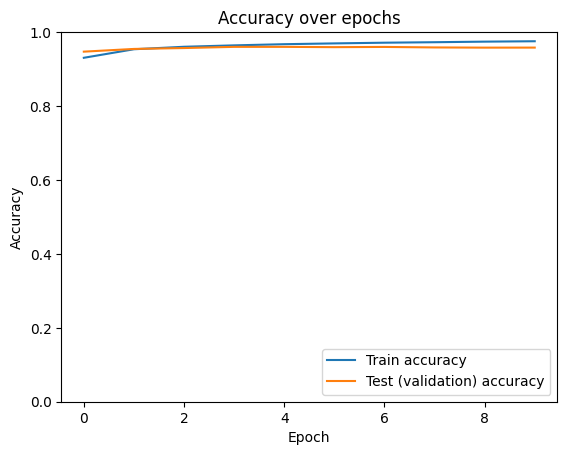

In [20]:
# Viewing train|test accuracy graph
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test (validation) accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.title("Accuracy over epochs")
plt.legend(loc='lower right')
plt.show()

#Model testing on my own examples

In [40]:
# Function for own examples testing
def predict_text_sentiment(own_text_seq, model):
    text_sent = ""
    counter = 1
    for review in own_text_seq:
        # Print actual review text
        print(f"{counter}) {review}")
        counter += 1
        # Review text tokenization and tokenized text matrix filling
        review_input = pad_sequences(tokenizer.texts_to_sequences([review]), maxlen = text_length)
        # Predicting sentiment
        label_pred = model.predict(review_input)
        '''
        # Printing text variation of sentiment
        if label_pred == 0:
            text_sent = "Extremely negative"     # Вкрай негативно
        if label_pred > 0 & label_pred <= 0.1:
            text_sent = "Very negative"          # Дуже негативно
        if label_pred > 0.1 & label_pred <= 0.2:
            text_sent = "Negative"               # Негативно
        if label_pred > 0.2 & label_pred <= 0.3:
            text_sent = "Moderately negative"    # Помірно негативно
        if label_pred > 0.3 & label_pred <= 0.4:
            text_sent = "Slightly negative"      # Помірно негативно
        if label_pred > 0.4 & label_pred <= 0.5:
            text_sent = "Neutral"                # Нейтрально
        if label_pred > 0.5 & label_pred <= 0.6:
            text_sent = "Slightly positive"      # Злегка позитивно
        if label_pred > 0.6 & label_pred <= 0.7:
            text_sent = "Moderately positive"    # Помірно позитивно
        if label_pred > 0.7 & label_pred <= 0.8:
            text_sent = "Positive"               # Позитивно
        if label_pred > 0.8 & label_pred <= 0.9:
            text_sent = "Very positive"          # Дуже позитивно
        if label_pred > 0.9 & label_pred <= 1:
            text_sent = "Extremely positive"     # Вкрай позитивно
        '''
        # Printing predicted sentiment
        #print(f"{label_pred} ==> Text sentiment: '{text_sent}'\n")
        print(f"({label_pred})\n")

In [34]:
# Creating my own review examples
own_review_set = [# Positive reviews examples
                  "This restaurant is fantastic! The service was prompt and courteous, and the food was delicious and well-prepared. The steak was cooked to perfection, and the dessert was out of this world. Highly recommend!",
                  "We had an amazing stay at this hotel! The rooms were spotless and well-decorated, and the staff went above and beyond to ensure we were comfortable. The breakfast buffet was excellent, with a wide variety of options. We'll definitely be back!",
                  "I love this laptop! It's fast, lightweight, and has a fantastic battery life. The display is crisp and clear, and it's perfect for both work and play. Great value for the price!",
                  "This movie was incredible! The plot was gripping, the acting was top-notch, and the special effects were spectacular. I was on the edge of my seat the entire time. Highly recommend!",
                  "This book is a masterpiece! The story is captivating, the characters are richly developed, and the writing is beautiful. I couldn't put it down and was sad when it ended. A must-read!",
                  # Negative reviews examples
                  "I had high hopes for this place, but I was thoroughly disappointed. The service was incredibly slow, and the food arrived cold. To make matters worse, the steak was overcooked and chewy. I won't be coming back here.",
                  "Our stay at this hotel was a nightmare. The room was dirty, and the bed linens were stained. We found bugs in the bathroom, and the staff was unresponsive to our complaints. Avoid this place at all costs.",
                  "I bought this laptop a month ago, and it's already giving me problems. It frequently freezes, the battery life is terrible, and customer support has been unhelpful. I regret this purchase.",
                  "This movie was a huge letdown. The plot was predictable, the acting was subpar, and the special effects were overdone. I struggled to stay awake through the whole thing.",
                  "I couldn't get through this book. The plot was slow, the characters were one-dimensional, and the writing style was bland. I wouldn't recommend it to anyone.",
                  # Neutral reviews examples
                  "The restaurant has a nice ambiance, and the staff was friendly. The food was decent, but nothing to write home about. Prices are a bit on the higher side for the portion sizes. It's an okay spot for a casual meal.",
                  "The hotel was average overall. The location is convenient, and the room was clean but nothing special. The breakfast was standard continental fare. It's fine for a short stay if you're not expecting luxury.",
                  "This laptop is okay for basic tasks like web browsing and word processing. The battery life is average, and the build quality is decent. However, it's not powerful enough for gaming or heavy-duty work. It's a good budget option.",
                  "The movie was okay. The storyline had some interesting moments, and the acting was decent. However, it felt a bit too long, and some scenes were unnecessary. It's worth a watch if you have time to kill.",
                  "The book was a decent read. The plot had some interesting twists, and the characters were well-developed. However, the pacing was uneven, and some parts dragged on. It's a good book to pass the time."
                  ]

In [43]:
# Testing RNN LSTM NN model on my own review examples
predict_text_sentiment(own_review_set, LSTM_model)

1) This restaurant is fantastic! The service was prompt and courteous, and the food was delicious and well-prepared. The steak was cooked to perfection, and the dessert was out of this world. Highly recommend!
1/1 [==============================] - 0s 21ms/step
([[0.99999]])

2) We had an amazing stay at this hotel! The rooms were spotless and well-decorated, and the staff went above and beyond to ensure we were comfortable. The breakfast buffet was excellent, with a wide variety of options. We'll definitely be back!
1/1 [==============================] - 0s 20ms/step
([[0.9999628]])

3) I love this laptop! It's fast, lightweight, and has a fantastic battery life. The display is crisp and clear, and it's perfect for both work and play. Great value for the price!
1/1 [==============================] - 0s 23ms/step
([[0.99990916]])

4) This movie was incredible! The plot was gripping, the acting was top-notch, and the special effects were spectacular. I was on the edge of my seat the ent

#Reviews from my own test set

In [ ]:
# Positive reviews examples
#===================================================================================================
'''
This restaurant is fantastic!
The service was prompt and courteous, and the food was delicious and well-prepared.
The steak was cooked to perfection, and the dessert was out of this world.
Highly recommend!
'''
#===================================================================================================
'''
We had an amazing stay at this hotel!
The rooms were spotless and well-decorated, and the staff went above and beyond to ensure we were comfortable.
The breakfast buffet was excellent, with a wide variety of options.
We'll definitely be back!
'''
#===================================================================================================
'''
I love this laptop! It's fast, lightweight, and has a fantastic battery life.
The display is crisp and clear, and it's perfect for both work and play.
Great value for the price!
'''
#===================================================================================================
'''
This movie was incredible!
The plot was gripping, the acting was top-notch, and the special effects were spectacular.
I was on the edge of my seat the entire time.
Highly recommend!
'''
#===================================================================================================
'''
This book is a masterpiece!
The story is captivating, the characters are richly developed, and the writing is beautiful.
I couldn't put it down and was sad when it ended. A must-read!
'''
#===================================================================================================

In [ ]:
# Negative reviews examples
#===================================================================================================
'''
I had high hopes for this place, but I was thoroughly disappointed.
The service was incredibly slow, and the food arrived cold.
To make matters worse, the steak was overcooked and chewy. I won't be coming back here.
'''
#===================================================================================================
'''
Our stay at this hotel was a nightmare. The room was dirty, and the bed linens were stained.
We found bugs in the bathroom, and the staff was unresponsive to our complaints.
Avoid this place at all costs.
'''
#===================================================================================================
'''
I bought this laptop a month ago, and it's already giving me problems.
It frequently freezes, the battery life is terrible, and customer support has been unhelpful.
I regret this purchase.
'''
#===================================================================================================
'''
This movie was a huge letdown.
The plot was predictable, the acting was subpar, and the special effects were overdone.
I struggled to stay awake through the whole thing.
'''
#===================================================================================================
'''
I couldn't get through this book.
The plot was slow, the characters were one-dimensional, and the writing style was bland.
I wouldn't recommend it to anyone.
'''
#===================================================================================================

In [ ]:
# Neutral reviews examples
#===================================================================================================
'''
The restaurant has a nice ambiance, and the staff was friendly.
The food was decent, but nothing to write home about.
Prices are a bit on the higher side for the portion sizes.
It's an okay spot for a casual meal.
'''
#===================================================================================================
'''
The hotel was average overall.
The location is convenient, and the room was clean but nothing special.
The breakfast was standard continental fare.
It's fine for a short stay if you're not expecting luxury.
'''
#===================================================================================================
'''
This laptop is okay for basic tasks like web browsing and word processing.
The battery life is average, and the build quality is decent.
However, it's not powerful enough for gaming or heavy-duty work.
It's a good budget option.
'''
#===================================================================================================
'''
The movie was okay. The storyline had some interesting moments, and the acting was decent.
However, it felt a bit too long, and some scenes were unnecessary.
It's worth a watch if you have time to kill.
'''
#===================================================================================================
'''
The book was a decent read.
The plot had some interesting twists, and the characters were well-developed.
However, the pacing was uneven, and some parts dragged on.
It's a good book to pass the time.
'''
#===================================================================================================